In [ ]:

import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Exploratort Data Analysis (EDA)**

In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
q3 = df['chol'].quantile(0.75)
q1 = df['chol'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(369.75, 115.75)

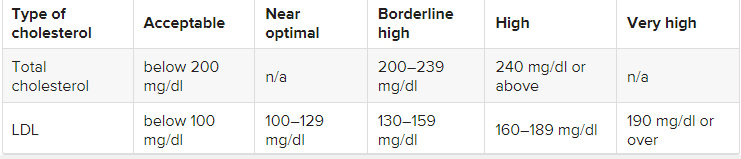

In [ ]:
q3 = df['trestbps'].quantile(0.75)
q1 = df['trestbps'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(170.0, 90.0)

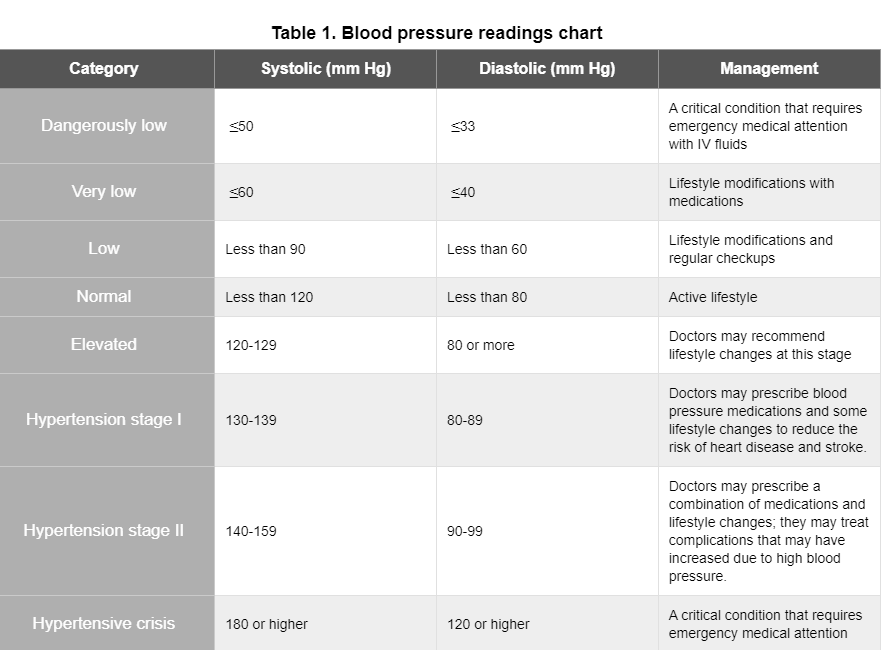

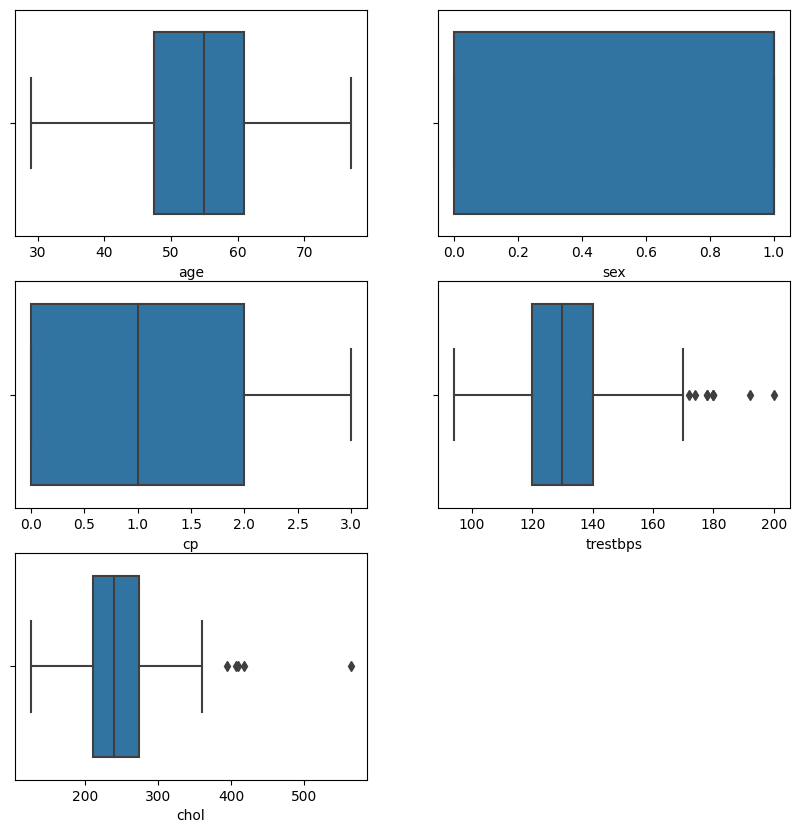

In [ ]:
n = 1
cols =["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
plt.figure(figsize=(10,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


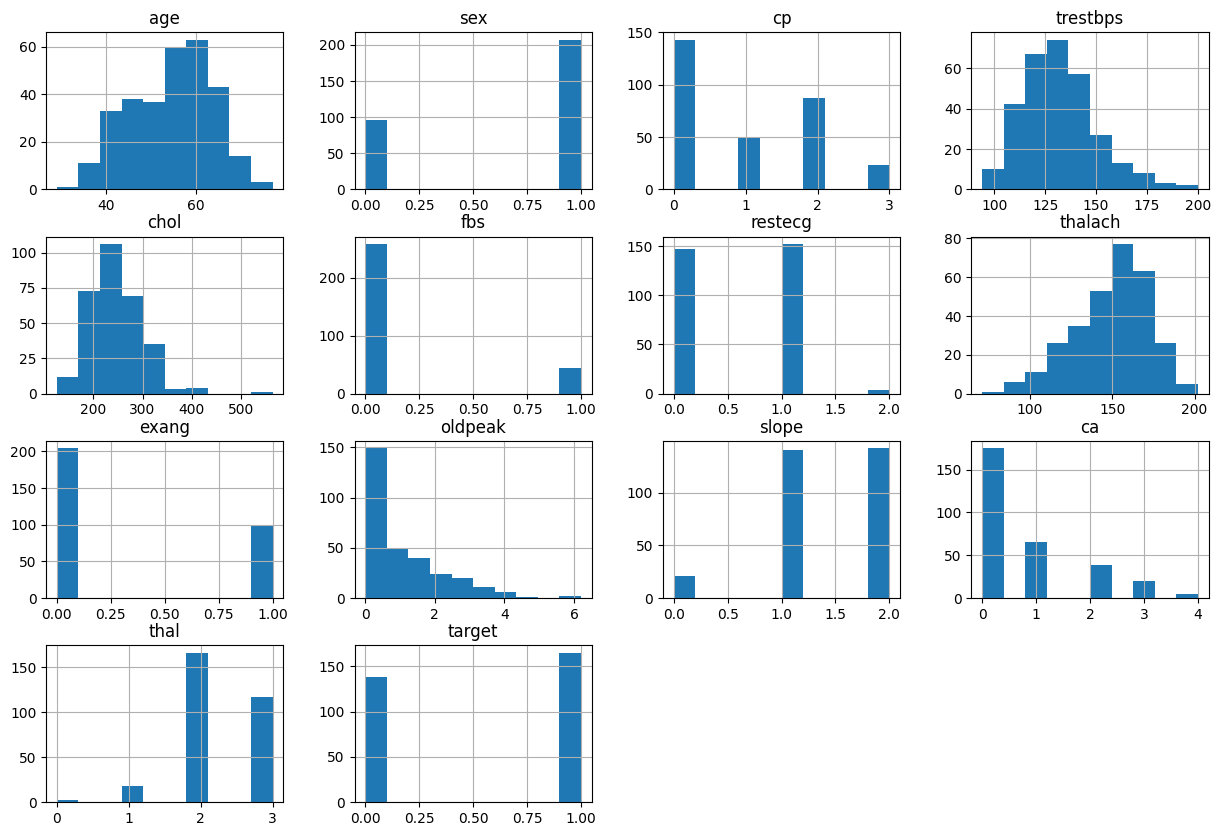

In [ ]:
df.hist(figsize=(15,10))
plt.show()

<ipython-input-24-4dcdc6194657>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


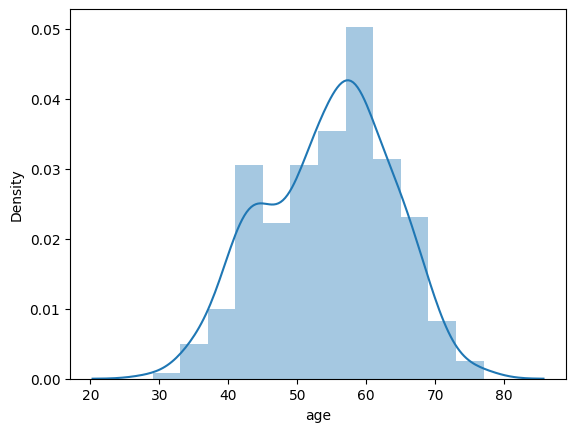

<ipython-input-24-4dcdc6194657>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])


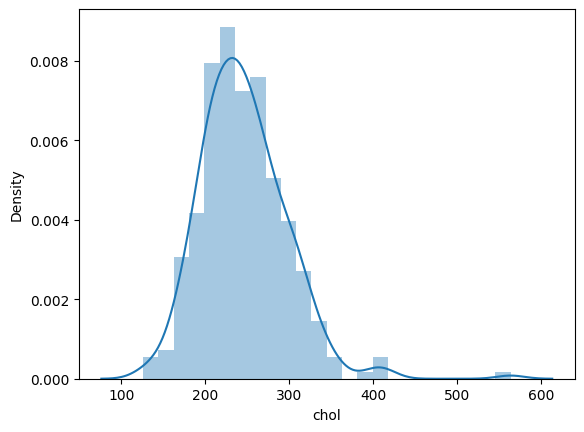

<ipython-input-24-4dcdc6194657>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalach'])


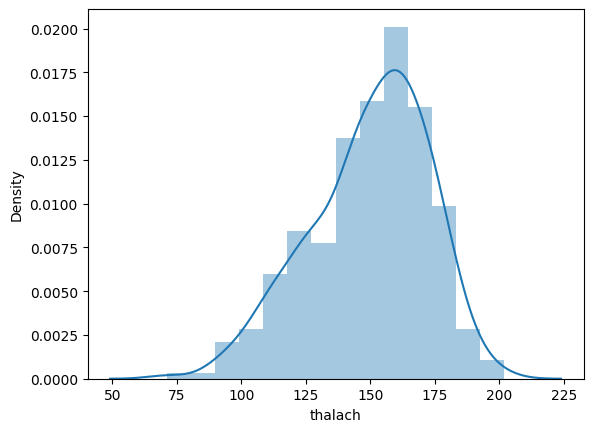

<ipython-input-24-4dcdc6194657>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'])


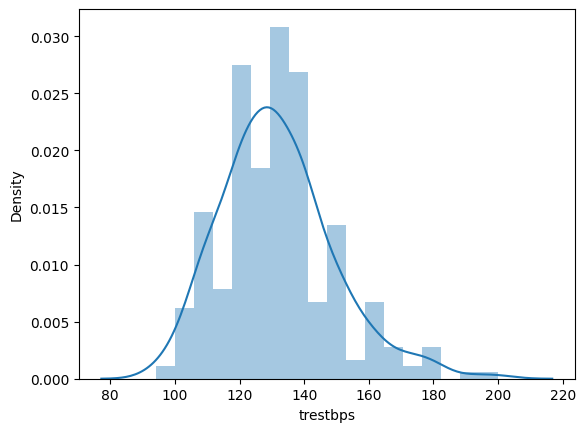

In [ ]:
sns.distplot(df['age'])
plt.show()
sns.distplot(df['chol'])
plt.show()
sns.distplot(df['thalach'])
plt.show()
sns.distplot(df['trestbps'])
plt.show()

By plotting histogram we can say age,chol,thalach,trestbps columns are normally distributed

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
for column in df:
    print(df[column].value_counts())


58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, 

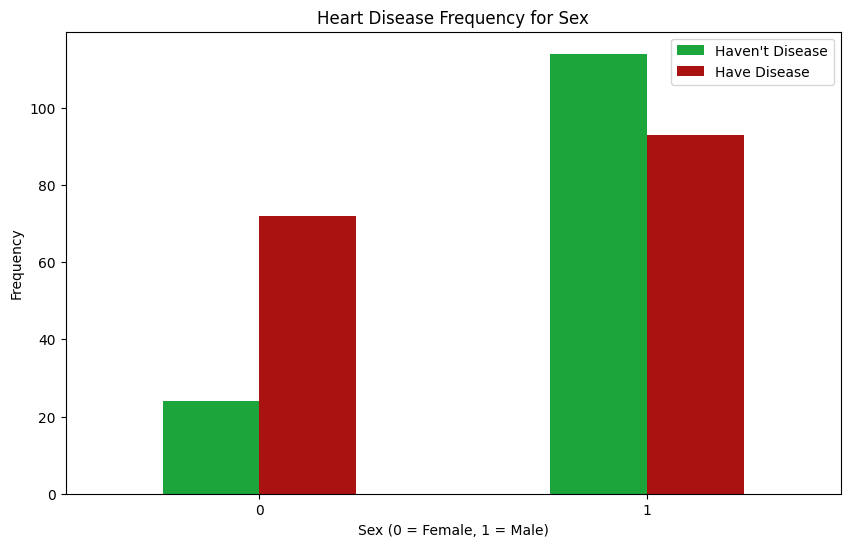

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

using plot we can say males are more affected than female by have disease

In [ ]:
df[df.target==1].age.sort_values(ascending= True)

72     29
58     34
125    34
157    35
65     35
       ..
60     71
25     71
151    71
129    74
144    76
Name: age, Length: 165, dtype: int64

In [ ]:
df[df.target==0].age.sort_values(ascending= True)

227    35
239    35
259    38
212    39
175    40
       ..
249    69
234    70
240    70
225    70
238    77
Name: age, Length: 138, dtype: int64

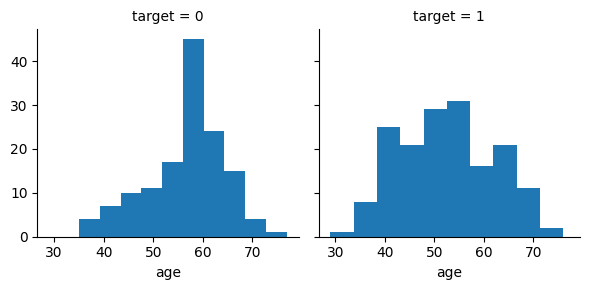

In [ ]:
g = sns.FacetGrid(data=df, col='target')
g.map(plt.hist,'age')

In [ ]:
df[df.target==1].age.max()

76

In [ ]:
df[df.target==1].age.min()

29

In the age of 29 to 76 peoples are affected by a have disease

From here we can say that as age increases, people got affected more by the heart disease than younger people

Text(0.5, 0, 'Sex (0 = Female, 1 = Male)')

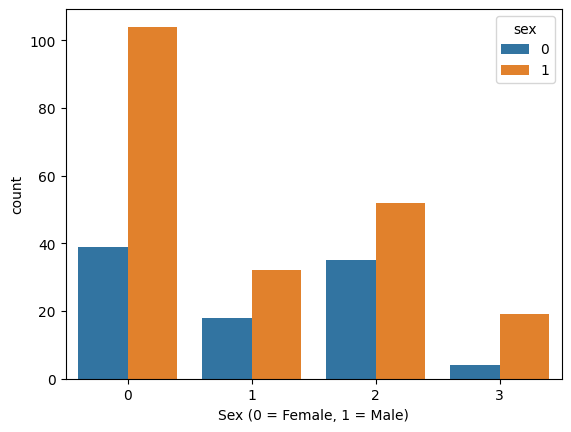

In [ ]:
sns.countplot(x='cp', hue='sex', data=df)
plt.xlabel('Sex (0 = Female, 1 = Male)')

For the case of female, this affected rate is very minimum compared with the male.

<Axes: xlabel='fbs', ylabel='count'>

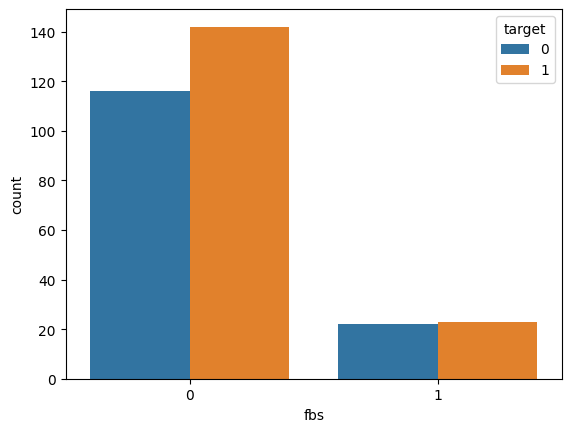

In [ ]:
sns.countplot(x='fbs', hue='target', data=df)

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

According to our dataset who has FastingBS they are lesser affected by the heart disease, and
who has not FastingBS they affected in high amounts by heart disease

In [ ]:
#Cholesterol with have disease
df[df.target == 1].chol.value_counts()

240    4
204    4
226    4
197    4
211    4
      ..
275    1
318    1
298    1
304    1
157    1
Name: chol, Length: 104, dtype: int64

In [ ]:
df.groupby("sex").chol.count()

sex
0     96
1    207
Name: chol, dtype: int64

Males have more Cholesterol than females

<Axes: xlabel='restecg', ylabel='count'>

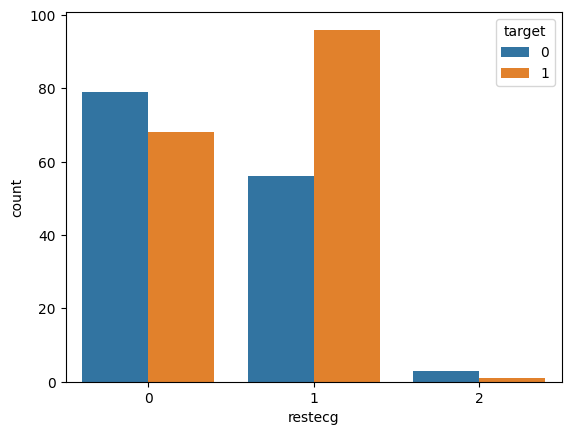

In [ ]:
sns.countplot(x='restecg', hue='target', data=df)

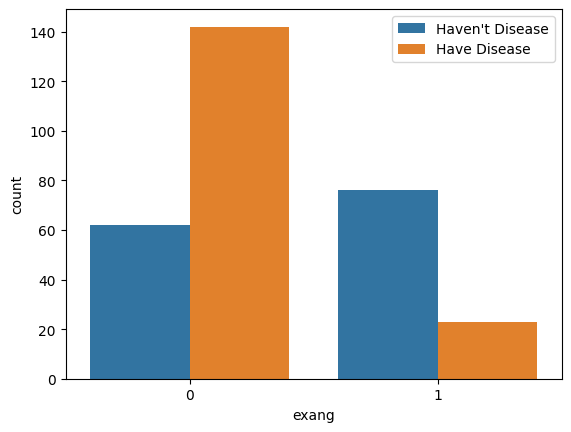

In [ ]:
sns.countplot(x='exang', hue='target', data=df)
plt.legend(["Haven't Disease", "Have Disease"])

Who has ExerciseAngina or who do not exercise, they are affected highly in Heart Disease

Who doing exercise daily, they are affected in lesser amount

<ipython-input-63-8f09a6a6e2d9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exang_y['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


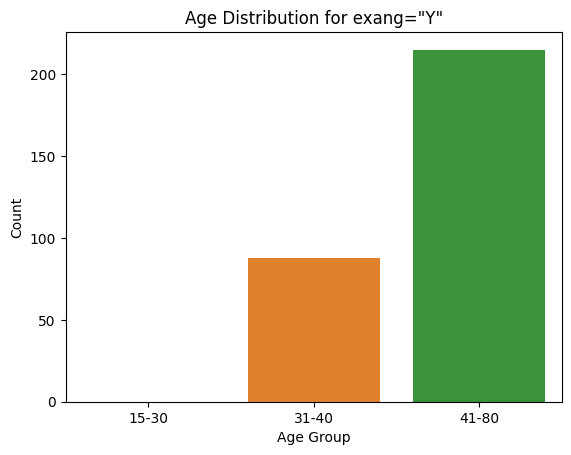

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
exang_y = df[df['exang'] == 'Y']

# Define bins and labels for age groups
bins = [15, 25, 50, 80]
labels = ['15-30','31-40', '41-80']

# Create a new column 'AgeGroup' with the age groups
exang_y['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create a countplot using Seaborn
sns.countplot(x='AgeGroup', data=exang_y, order=labels)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution for exang="Y"')

# Show the plot
plt.show()


Old people has more ExerciseAngina than youngers

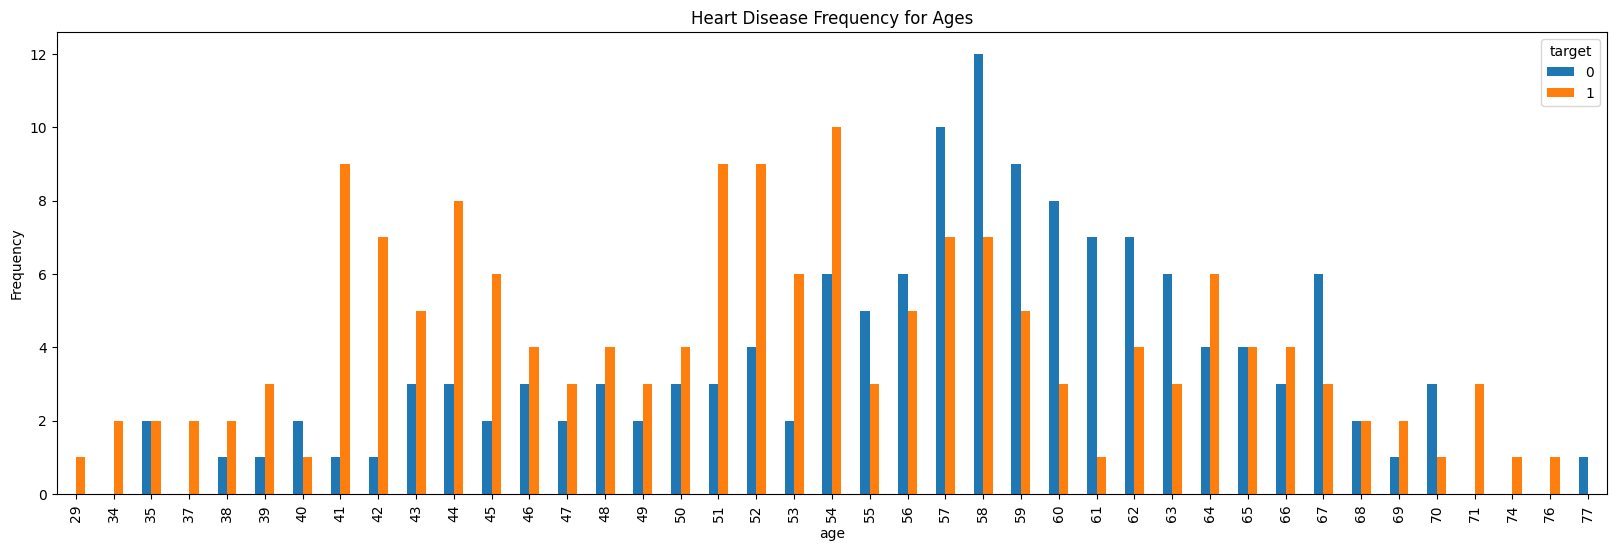

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

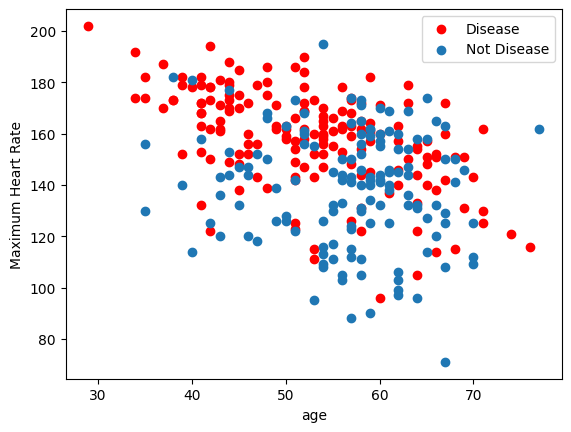

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("age")
plt.ylabel("Maximum Heart Rate")
plt.show()

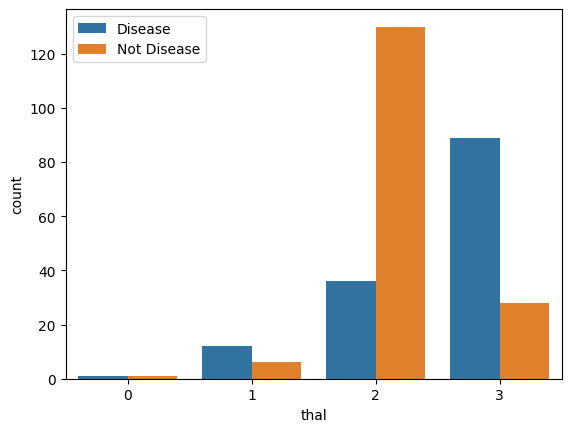

In [ ]:
sns.countplot(x='thal', hue='target', data=df)
plt.legend(["Disease", "Not Disease"])

<ipython-input-73-cfe278ea90a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_y['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


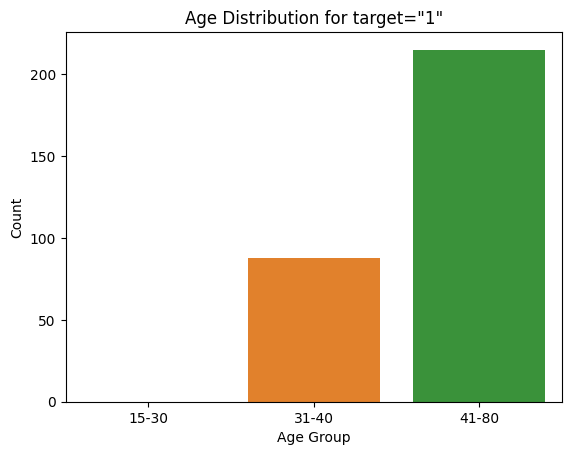

In [ ]:
target_y = df[df['target'] == '1']

# Define bins and labels for age groups
bins = [15, 25, 50, 80]
labels = ['15-30','31-40', '41-80']

# Create a new column 'AgeGroup' with the age groups
target_y['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create a countplot using Seaborn
sns.countplot(x='AgeGroup', data=target_y, order=labels)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution for target="1"')

# Show the plot
plt.show()


# **Conclusion from the EDA:**

1. Age wise we can say aged people (more specifically above 50) needs more awareness by changing their lifestyle, food habits, doing exercise everyday, then only they can prevent this Heart Disease

2. According to our dataset sex wise males are more affected, so males need more aware
about heart disease
3. Who do not have blood sugar that's good thing, but they should keep aware about heart
disease, because according to our dataset they are affected more in heart disease
4. Every person should keep some good habits in their daily life regardless age & sex wise,
then only we can prevent heart disease. Because this disease never occurs overnight,
5. Place heightened emphasis on individuals aged 40 and above, given that they represent the predominant demographic affected by heart disease.







# **Split The Data**

In [ ]:
X=df.drop(['target'],axis=1)
y=df['target']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111) # split the data


# **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_train, y_train) #training of data happens

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.predict_proba(X_test)

array([[0.12647722, 0.87352278],
       [0.09242453, 0.90757547],
       [0.95099697, 0.04900303],
       [0.21396884, 0.78603116],
       [0.12786602, 0.87213398],
       [0.01530424, 0.98469576],
       [0.54364302, 0.45635698],
       [0.10567354, 0.89432646],
       [0.94570632, 0.05429368],
       [0.16470078, 0.83529922],
       [0.31598003, 0.68401997],
       [0.10274755, 0.89725245],
       [0.05677697, 0.94322303],
       [0.02008371, 0.97991629],
       [0.83594767, 0.16405233],
       [0.86097115, 0.13902885],
       [0.25662548, 0.74337452],
       [0.73872844, 0.26127156],
       [0.06047646, 0.93952354],
       [0.55468866, 0.44531134],
       [0.15604406, 0.84395594],
       [0.91429397, 0.08570603],
       [0.31022705, 0.68977295],
       [0.32655657, 0.67344343],
       [0.09525873, 0.90474127],
       [0.97373841, 0.02626159],
       [0.13560035, 0.86439965],
       [0.72113232, 0.27886768],
       [0.26817926, 0.73182074],
       [0.38345475, 0.61654525],
       [0.

In [ ]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))


0.8584905660377359
0.8681318681318682


In [ ]:
ypred=log_reg.predict(X_test)
ypred


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1])

In [ ]:
y_train_pred=log_reg.predict(X_train)

In [ ]:
#getting all scores for Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
train_accuracy_log = round(accuracy_score(y_train_pred,y_train), 3)
accuracy_log = round(accuracy_score(ypred,y_test), 3)
precision_score_log = round(precision_score(ypred,y_test), 3)
recall_score_log = round(recall_score(ypred,y_test), 3)
f1_score_log = round(f1_score(ypred,y_test), 3)
roc_score_log = round(roc_auc_score(ypred,y_test), 3)
print("The accuracy on train data is ", train_accuracy_log)
print("The accuracy on test data is ", accuracy_log)
print("The precision on test data is ", precision_score_log)
print("The recall on test data is ", recall_score_log)
print("The f1 on test data is ", f1_score_log)
print("The roc_score on test data is ", roc_score_log)

The accuracy on train data is  0.858
The accuracy on test data is  0.868
The precision on test data is  0.945
The recall on test data is  0.852
The f1 on test data is  0.897
The roc_score on test data is  0.876


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[27,  9],
       [ 3, 52]])

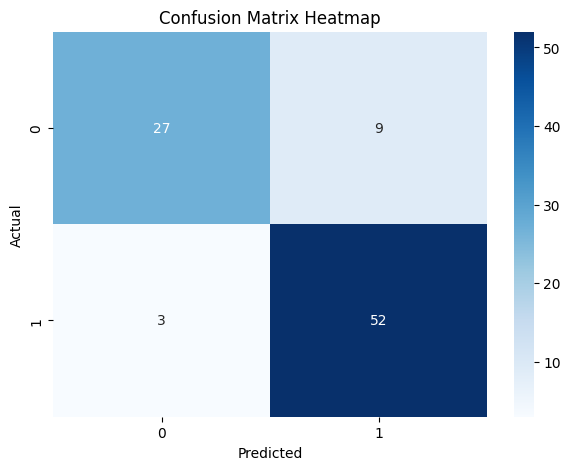

In [ ]:
# Assuming you have a confusion matrix stored in 'cm'
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


# **Random Forest Classifier**

## Choosing the best depth value

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_Classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_Classifier.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.8248917748917748
Depth :  4 cross_val_score :  0.7967532467532468
Depth :  8 cross_val_score :  0.8203463203463205
Depth :  10 cross_val_score :  0.8203463203463205
Depth :  12 cross_val_score :  0.8251082251082252
Depth :  14 cross_val_score :  0.8251082251082252
Depth :  16 cross_val_score :  0.8251082251082252
Depth :  18 cross_val_score :  0.8251082251082252


In [ ]:

# Find the maximum cross-validation score and its corresponding depth
max_cross_val_score = max(cross_val_rf)
best_depth = max_depth[cross_val_rf.index(max_cross_val_score)]

print("Best Depth:", best_depth)
print("Max Cross-Validation Score:", max_cross_val_score)


Best Depth: 12
Max Cross-Validation Score: 0.8251082251082252


# Implementing Random Forest Classifier

In [ ]:

rf_regressor=RandomForestClassifier(max_depth=4, random_state=42)
rf_regressor.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
rfc = RandomForestClassifier( max_depth =4,random_state = 42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))


0.9056603773584906
0.8351648351648352


In [ ]:
ypred_rf=rfc.predict(X_test)
y_train_pred_rf=rfc.predict(X_train)


In [ ]:
#getting all scores for RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
train_accuracy_rf = round(accuracy_score(y_train_pred_rf,y_train), 3)
accuracy_rf = round(accuracy_score(ypred_rf,y_test), 3)
precision_score_rf = round(precision_score(ypred_rf,y_test), 3)
recall_score_rf = round(recall_score(ypred_rf,y_test), 3)
f1_score_rf= round(f1_score(ypred_rf,y_test), 3)
roc_score_rf = round(roc_auc_score(ypred,y_test), 3)
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", accuracy_rf)
print("The precision on test data is ", precision_score_rf)
print("The recall on test data is ", recall_score_rf)
print("The f1 on test data is ", f1_score_rf)
print("The roc_score on test data is ", roc_score_rf)

The accuracy on train data is  0.906
The accuracy on test data is  0.835
The precision on test data is  0.945
The recall on test data is  0.812
The f1 on test data is  0.874
The roc_score on test data is  0.876


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_rf)
cm

array([[24, 12],
       [ 3, 52]])

In [ ]:
# Get the classification_report for Random Forest Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_rf))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        36
           1       0.81      0.95      0.87        55

    accuracy                           0.84        91
   macro avg       0.85      0.81      0.82        91
weighted avg       0.84      0.84      0.83        91



# Extreme Gradient Boosting Classifier

In [ ]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.3056404177516535
Learning rate :  0.05 cross_val_score: 0.3229233751702662
Learning rate :  0.08 cross_val_score: 0.33078757789598456
Learning rate :  0.1 cross_val_score: 0.33117878801799244
Learning rate :  0.2 cross_val_score: 0.33802078969559896
Learning rate :  0.25 cross_val_score: 0.3275737358294508
Learning rate :  0.3 cross_val_score: 0.31560010216935586


In [ ]:

cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.33802078969559896

In [ ]:
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.2 and Cross_val_score is: 0.33802078969559896


# Choosing the best Learning Rate

In [ ]:

 xgb_regressor= xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) # initialise the model
 xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01,random_state = 42)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8915094339622641
0.8131868131868132


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_rf)
cm

array([[24, 12],
       [ 3, 52]])

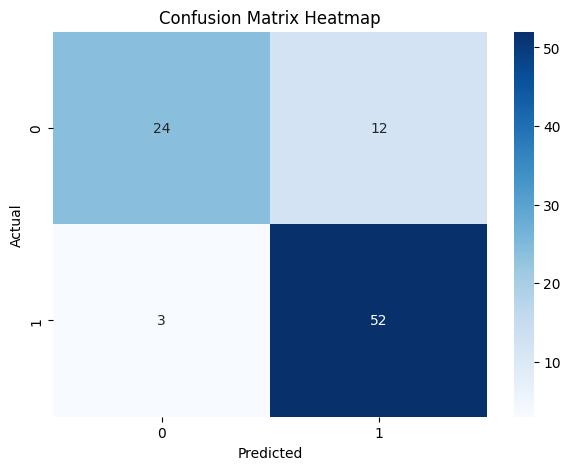

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in 'cm'
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

ROC AUC Score: 0.8477272727272727


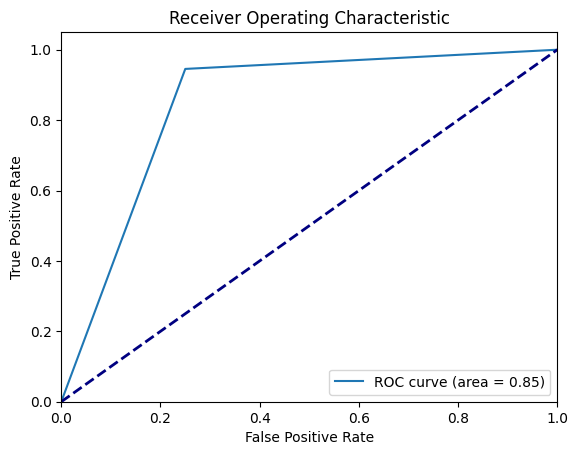

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained a logistic regression model (log_reg) and X_test, y_test data is available


# Make predictions on the test data
#y_test_predictions = log_reg.predict_proba(X_test)[:, 1]  # Use predicted probabilities for the positive class
y_test_predictions =log_reg.predict(X_test)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_test_predictions)

# Print the AUC score
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle
filename = 'model_trained.pkl'
pickle.dump(gbc, open(filename, 'wb'))